# Project SpotiData
## The most streamed songs of all time

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import requests
from config import ClientID,ClientSecret

In [34]:
#Import csv
songs_csv=pd.read_csv("Resources/Most-Streamed-Songs-All-Time.csv")
songs_csv.head()

,#,Cover,Artist,Title,Streams,Daily,Year
0,1,NaN,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,NaN,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,NaN,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,NaN,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,NaN,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019


In [35]:
#format
songs_csv.rename(columns={"#":"Ranking"},inplace=True)
songs_csv.head()

,Ranking,Cover,Artist,Title,Streams,Daily,Year
0,1,NaN,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,NaN,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,NaN,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,NaN,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,NaN,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019


In [36]:
# remove columns we don't need
songs = songs_csv[["Ranking","Artist","Title","Streams","Daily","Year"]]
songs.head()

,Ranking,Artist,Title,Streams,Daily,Year
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019


In [37]:
# from which year are the most played songs on spotify?
years=songs["Year"].value_counts()
years

2017    10
2019    10
2018    10
2016     8
2015     3
2013     2
2014     2
2020     2
1975     1
2012     1
2021     1
Name: Year, dtype: int64

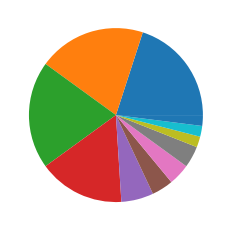

In [38]:
#plot
pct_year = plt.pie(years)                ##########################  BAR !!!!!!!

## Spotify API

In [52]:
#API KEY - API AUTH
# ClientID and ClientSecret in config.py 
# !!!!! to make it work, you should have your own config.py

AUTH_URL = "https://accounts.spotify.com/api/token"
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': ClientID,
    'client_secret': ClientSecret,
})

#Convert response to JSON
auth_response_data = auth_response.json()

#Save the access token
access_token = auth_response_data['access_token']

#Need to pass access token into header to send properly formed GET request to API server
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [40]:
#url
BASE_URL = 'https://api.spotify.com/v1/' 
search_BASE_URL=f"{BASE_URL}search?"

In [42]:
#test
searchtype="track"
params={"q":"Shape of You",
       "type":{searchtype}}
info=requests.get(search_BASE_URL ,params=params, headers=headers).json()
# headers = api key
pprint(info)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Shape+of+You&type=track&offset=0&limit=20',
            'items': [{'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
                                              'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
                                              'id': '6eUKZXaKkcviH0Ku9w2n3V',
                                              'name': 'Ed Sheeran',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V'}],
                                 'available_markets': ['AD',
                                                       'AE',
                                                       'AG',
                                                       'AL',
                                        

                                             'BI',
                                             'BJ',
                                             'BN',
                                             'BO',
                                             'BR',
                                             'BS',
                                             'BT',
                                             'BW',
                                             'BY',
                                             'BZ',
                                             'CA',
                                             'CD',
                                             'CG',
                                             'CH',
                                             'CI',
                                             'CL',
                                             'CM',
                                             'CO',
                                             'CR',
                               

                                             'CI',
                                             'CL',
                                             'CM',
                                             'CO',
                                             'CR',
                                             'CV',
                                             'CW',
                                             'CY',
                                             'CZ',
                                             'DE',
                                             'DJ',
                                             'DK',
                                             'DM',
                                             'DO',
                                             'DZ',
                                             'EC',
                                             'EE',
                                             'EG',
                                             'ES',
                               

                                             'url': 'https://i.scdn.co/image/ab67616d0000b2732a74a83033b30c62f376058f',
                                             'width': 640},
                                            {'height': 300,
                                             'url': 'https://i.scdn.co/image/ab67616d00001e022a74a83033b30c62f376058f',
                                             'width': 300},
                                            {'height': 64,
                                             'url': 'https://i.scdn.co/image/ab67616d000048512a74a83033b30c62f376058f',
                                             'width': 64}],
                                 'name': 'Shape of You (feat. Nyla & Kranium) '
                                         '[Major Lazer Remix]',
                                 'release_date': '2017-02-24',
                                 'release_date_precision': 'day',
                                 'total_tracks': 1,
                

                                                       'ES',
                                                       'FI',
                                                       'FJ',
                                                       'FM',
                                                       'FR',
                                                       'GA',
                                                       'GB',
                                                       'GD',
                                                       'GE',
                                                       'GH',
                                                       'GM',
                                                       'GN',
                                                       'GQ',
                                                       'GR',
                                                       'GT',
                                                       'GW',
                        

                      {'album': {'album_type': 'single',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/00YTqRClk82aMchQQpYMd5'},
                                              'href': 'https://api.spotify.com/v1/artists/00YTqRClk82aMchQQpYMd5',
                                              'id': '00YTqRClk82aMchQQpYMd5',
                                              'name': 'Our Last Night',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:00YTqRClk82aMchQQpYMd5'}],
                                 'available_markets': ['AD',
                                                       'AE',
                                                       'AG',
                                                       'AL',
                                                       'AM',
                                                       'AO',
                  

                                             'LT',
                                             'LU',
                                             'LV',
                                             'LY',
                                             'MA',
                                             'MC',
                                             'MD',
                                             'ME',
                                             'MG',
                                             'MH',
                                             'MK',
                                             'ML',
                                             'MN',
                                             'MO',
                                             'MR',
                                             'MT',
                                             'MU',
                                             'MV',
                                             'MW',
                               

In [45]:
#get track ID
track_id=info["tracks"]['items'][0]['id']
track_id

'7qiZfU4dY1lWllzX7mPBI3'

In [ ]:
#check song with ID
# https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3 

### GET Audio Analysis

In [46]:
# doc: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis
# request GET 
# url https://api.spotify.com/v1/audio-analysis/id
BASE_URL

'https://api.spotify.com/v1/'

In [47]:
analysis_url = BASE_URL + "audio-analysis/"
analysis_url

'https://api.spotify.com/v1/audio-analysis/'

In [50]:
song_analysis=requests.get(analysis_url+track_id, headers=headers).json()
pprint(song_analysis)

{'bars': [{'confidence': 0.578, 'duration': 2.49818, 'start': 1.88872},
          {'confidence': 0.392, 'duration': 2.49811, 'start': 4.3869},
          {'confidence': 0.528, 'duration': 2.50267, 'start': 6.88501},
          {'confidence': 0.4, 'duration': 2.50484, 'start': 9.38769},
          {'confidence': 0.566, 'duration': 2.49535, 'start': 11.89253},
          {'confidence': 0.501, 'duration': 2.49867, 'start': 14.38788},
          {'confidence': 0.419, 'duration': 2.50093, 'start': 16.88655},
          {'confidence': 0.228, 'duration': 2.50271, 'start': 19.38749},
          {'confidence': 0.38, 'duration': 2.50223, 'start': 21.89019},
          {'confidence': 0.173, 'duration': 2.49614, 'start': 24.39243},
          {'confidence': 0.178, 'duration': 2.49615, 'start': 26.88856},
          {'confidence': 0.28, 'duration': 2.50348, 'start': 29.38471},
          {'confidence': 0.471, 'duration': 2.5048, 'start': 31.88819},
          {'confidence': 0.576, 'duration': 2.49724, 'start':

              {'confidence': 1.0,
               'duration': 0.21896,
               'loudness_end': 0.0,
               'loudness_max': -2.958,
               'loudness_max_time': 0.10216,
               'loudness_start': -24.817,
               'pitches': [0.4,
                           1.0,
                           0.323,
                           0.307,
                           0.678,
                           0.375,
                           0.264,
                           0.358,
                           0.683,
                           0.164,
                           0.099,
                           0.171],
               'start': 5.39918,
               'timbre': [43.595,
                          -17.452,
                          16.369,
                          -106.192,
                          56.52,
                          24.377,
                          17.239,
                          -85.904,
                          -12.162,
                    

               'loudness_end': 0.0,
               'loudness_max': -0.277,
               'loudness_max_time': 0.01268,
               'loudness_start': -22.517,
               'pitches': [0.072,
                           0.186,
                           0.037,
                           0.071,
                           0.115,
                           0.376,
                           1.0,
                           0.082,
                           0.032,
                           0.194,
                           0.034,
                           0.053],
               'start': 12.18476,
               'timbre': [50.672,
                          -96.519,
                          -64.995,
                          113.649,
                          25.518,
                          -62.342,
                          -22.126,
                          -49.058,
                          -17.787,
                          12.92,
                          -58.791,
                

               'loudness_max': -10.912,
               'loudness_max_time': 0.01601,
               'loudness_start': -15.14,
               'pitches': [0.468,
                           0.051,
                           0.019,
                           0.034,
                           0.212,
                           0.071,
                           0.103,
                           0.025,
                           0.036,
                           0.013,
                           0.038,
                           1.0],
               'start': 19.54499,
               'timbre': [46.647,
                          47.866,
                          -19.947,
                          -8.236,
                          -3.553,
                          -41.051,
                          -51.404,
                          -13.486,
                          -9.971,
                          7.021,
                          -12.367,
                          16.999]},
              {'con

               'loudness_start': -12.393,
               'pitches': [0.171,
                           0.452,
                           0.2,
                           0.233,
                           0.337,
                           0.359,
                           0.688,
                           0.574,
                           0.489,
                           1.0,
                           0.185,
                           0.113],
               'start': 27.38785,
               'timbre': [52.878,
                          73.014,
                          17.125,
                          -46.985,
                          0.839,
                          7.401,
                          -43.832,
                          -23.687,
                          -2.821,
                          6.014,
                          -20.074,
                          -11.019]},
              {'confidence': 0.136,
               'duration': 0.1732,
               'loudness_end': 0.0,


               'pitches': [0.155,
                           1.0,
                           0.183,
                           0.181,
                           0.089,
                           0.194,
                           0.42,
                           0.312,
                           0.566,
                           0.082,
                           0.078,
                           0.071],
               'start': 35.87057,
               'timbre': [52.562,
                          42.919,
                          7.013,
                          -59.714,
                          -6.907,
                          19.185,
                          -27.385,
                          -27.654,
                          -11.242,
                          -11.386,
                          -29.257,
                          1.755]},
              {'confidence': 1.0,
               'duration': 0.30912,
               'loudness_end': 0.0,
               'loudness_max': -1.895,
 

                          -30.834,
                          -28.119,
                          -14.248,
                          -25.848,
                          7.409,
                          -18.583,
                          6.03]},
              {'confidence': 0.729,
               'duration': 0.30748,
               'loudness_end': 0.0,
               'loudness_max': -0.978,
               'loudness_max_time': 0.04944,
               'loudness_start': -8.053,
               'pitches': [0.14,
                           0.807,
                           0.101,
                           0.284,
                           0.055,
                           0.092,
                           0.493,
                           0.515,
                           1.0,
                           0.103,
                           0.07,
                           0.056],
               'start': 45.9176,
               'timbre': [56.113,
                          24.052,
                   

               'loudness_start': -7.497,
               'pitches': [0.045,
                           0.138,
                           0.067,
                           0.084,
                           0.077,
                           0.567,
                           1.0,
                           0.256,
                           0.055,
                           0.141,
                           0.04,
                           0.024],
               'start': 53.59746,
               'timbre': [51.283,
                          -47.094,
                          -27.5,
                          96.291,
                          -0.97,
                          -51.542,
                          -36.115,
                          -19.089,
                          -6.378,
                          8.982,
                          -38.84,
                          3.185]},
              {'confidence': 1.0,
               'duration': 0.1161,
               'loudness_end': 0.0,
    

                          -34.163,
                          -11.163]},
              {'confidence': 0.301,
               'duration': 0.11741,
               'loudness_end': 0.0,
               'loudness_max': -9.389,
               'loudness_max_time': 0.07164,
               'loudness_start': -13.17,
               'pitches': [0.015,
                           0.027,
                           0.038,
                           0.415,
                           1.0,
                           0.267,
                           0.038,
                           0.016,
                           0.017,
                           0.021,
                           0.012,
                           0.072],
               'start': 62.04272,
               'timbre': [49.093,
                          -46.839,
                          3.911,
                          -56.822,
                          1.005,
                          -23.559,
                          -47.045,
              

                          -43.028,
                          43.516,
                          17.292,
                          -36.14,
                          -18.719,
                          -19.526,
                          -7.11,
                          11.303,
                          2.947,
                          -6.887]},
              {'confidence': 0.724,
               'duration': 0.18186,
               'loudness_end': 0.0,
               'loudness_max': -3.967,
               'loudness_max_time': 0.09511,
               'loudness_start': -12.519,
               'pitches': [0.784,
                           1.0,
                           0.141,
                           0.077,
                           0.064,
                           0.126,
                           0.035,
                           0.044,
                           0.153,
                           0.049,
                           0.122,
                           0.061],
               '

                          4.544]},
              {'confidence': 0.269,
               'duration': 0.31542,
               'loudness_end': 0.0,
               'loudness_max': -1.364,
               'loudness_max_time': 0.00713,
               'loudness_start': -9.66,
               'pitches': [0.466,
                           0.322,
                           0.138,
                           0.221,
                           0.22,
                           0.097,
                           0.166,
                           0.103,
                           0.359,
                           1.0,
                           0.158,
                           0.636],
               'start': 77.4966,
               'timbre': [50.466,
                          -53.669,
                          -60.933,
                          68.668,
                          8.92,
                          -87.249,
                          -20.106,
                          -38.465,
                   

               'timbre': [53.453,
                          -8.0,
                          6.351,
                          69.58,
                          55.356,
                          -39.485,
                          -7.653,
                          5.437,
                          11.776,
                          11.702,
                          -25.632,
                          16.55]},
              {'confidence': 0.782,
               'duration': 0.12277,
               'loudness_end': 0.0,
               'loudness_max': -3.116,
               'loudness_max_time': 0.03883,
               'loudness_start': -16.097,
               'pitches': [0.202,
                           0.086,
                           0.042,
                           0.042,
                           0.143,
                           0.27,
                           1.0,
                           0.485,
                           0.498,
                           0.475,
                       

               'loudness_start': -17.495,
               'pitches': [0.354,
                           0.129,
                           0.153,
                           0.164,
                           0.487,
                           0.509,
                           0.518,
                           0.263,
                           0.285,
                           0.262,
                           0.233,
                           1.0],
               'start': 89.65247,
               'timbre': [56.427,
                          -20.81,
                          34.18,
                          -26.832,
                          64.816,
                          16.588,
                          -0.875,
                          20.217,
                          11.718,
                          -28.447,
                          28.643,
                          11.277]},
              {'confidence': 0.495,
               'duration': 0.18571,
               'loudness_end': 0.0

                           0.031,
                           0.029],
               'start': 95.19043,
               'timbre': [50.728,
                          64.293,
                          -28.728,
                          20.001,
                          -19.931,
                          3.674,
                          -85.097,
                          -7.843,
                          -5.832,
                          -4.905,
                          -55.355,
                          -26.332]},
              {'confidence': 1.0,
               'duration': 0.30789,
               'loudness_end': 0.0,
               'loudness_max': -2.395,
               'loudness_max_time': 0.07756,
               'loudness_start': -18.804,
               'pitches': [0.208,
                           1.0,
                           0.108,
                           0.126,
                           0.497,
                           0.447,
                           0.478,
               

                           0.667,
                           0.619,
                           0.828,
                           0.977,
                           0.765,
                           0.304,
                           0.347,
                           1.0],
               'start': 103.56231,
               'timbre': [48.365,
                          -58.706,
                          -11.1,
                          28.043,
                          28.865,
                          25.435,
                          -36.565,
                          -46.998,
                          -2.396,
                          -16.145,
                          -95.719,
                          -14.58]},
              {'confidence': 0.74,
               'duration': 0.14544,
               'loudness_end': 0.0,
               'loudness_max': -17.336,
               'loudness_max_time': 0.02558,
               'loudness_start': -27.628,
               'pitches': [0.244,
            

                           0.322,
                           0.129,
                           0.182,
                           0.037,
                           0.102],
               'start': 111.22916,
               'timbre': [53.047,
                          -17.241,
                          -52.535,
                          50.048,
                          4.757,
                          -24.51,
                          -17.181,
                          -15.237,
                          -3.682,
                          24.89,
                          -14.407,
                          -11.018]},
              {'confidence': 0.737,
               'duration': 0.12145,
               'loudness_end': 0.0,
               'loudness_max': -7.84,
               'loudness_max_time': 0.07583,
               'loudness_start': -16.511,
               'pitches': [0.069,
                           0.431,
                           0.385,
                           0.372,
           

               'timbre': [52.448,
                          29.591,
                          -1.569,
                          -46.127,
                          -19.622,
                          -13.725,
                          -63.835,
                          25.956,
                          -20.434,
                          -29.331,
                          -6.851,
                          -46.392]},
              {'confidence': 0.789,
               'duration': 0.30132,
               'loudness_end': 0.0,
               'loudness_max': -1.104,
               'loudness_max_time': 0.03943,
               'loudness_start': -11.172,
               'pitches': [0.044,
                           0.219,
                           0.083,
                           0.117,
                           0.414,
                           0.155,
                           0.097,
                           0.048,
                           0.112,
                           1.0,
           

               'start': 127.14676,
               'timbre': [51.219,
                          23.727,
                          -24.035,
                          54.718,
                          26.235,
                          22.18,
                          -11.401,
                          -27.527,
                          -33.552,
                          26.552,
                          -72.972,
                          -8.503]},
              {'confidence': 1.0,
               'duration': 0.198,
               'loudness_end': 0.0,
               'loudness_max': 0.874,
               'loudness_max_time': 0.03794,
               'loudness_start': -21.241,
               'pitches': [0.316,
                           0.442,
                           0.16,
                           0.259,
                           0.299,
                           0.298,
                           0.321,
                           0.392,
                           0.335,
                 

                           0.214,
                           0.214,
                           0.695,
                           0.692,
                           0.635,
                           0.71,
                           1.0,
                           0.265,
                           0.251,
                           0.179],
               'start': 135.30821,
               'timbre': [39.352,
                          21.249,
                          -11.646,
                          4.168,
                          11.654,
                          -92.985,
                          -58.301,
                          4.45,
                          -6.386,
                          21.724,
                          -2.728,
                          -9.566]},
              {'confidence': 1.0,
               'duration': 0.37215,
               'loudness_end': 0.0,
               'loudness_max': 0.91,
               'loudness_max_time': 0.09993,
               'loudness_star

               'timbre': [55.46,
                          -9.137,
                          11.264,
                          12.397,
                          21.376,
                          -6.65,
                          -6.274,
                          1.942,
                          -13.331,
                          -14.598,
                          9.536,
                          -3.805]},
              {'confidence': 0.707,
               'duration': 0.35415,
               'loudness_end': 0.0,
               'loudness_max': -0.357,
               'loudness_max_time': 0.06144,
               'loudness_start': -9.191,
               'pitches': [0.137,
                           0.23,
                           0.052,
                           0.059,
                           0.182,
                           0.358,
                           0.601,
                           0.437,
                           0.164,
                           1.0,
                      

                           0.107,
                           0.095,
                           0.143,
                           0.052,
                           0.015],
               'start': 148.56754,
               'timbre': [54.347,
                          -21.887,
                          5.941,
                          -1.97,
                          10.77,
                          -19.17,
                          -25.469,
                          -11.413,
                          -13.806,
                          -7.566,
                          11.42,
                          -18.931]},
              {'confidence': 0.646,
               'duration': 0.33057,
               'loudness_end': 0.0,
               'loudness_max': -0.119,
               'loudness_max_time': 0.02508,
               'loudness_start': -6.931,
               'pitches': [0.223,
                           0.29,
                           0.302,
                           0.9,
                 

               'start': 155.43529,
               'timbre': [54.677,
                          -25.712,
                          13.492,
                          31.888,
                          34.871,
                          -20.056,
                          27.041,
                          -7.53,
                          -0.179,
                          1.856,
                          -25.024,
                          -4.658]},
              {'confidence': 0.166,
               'duration': 0.19206,
               'loudness_end': 0.0,
               'loudness_max': -8.357,
               'loudness_max_time': 0.08116,
               'loudness_start': -11.782,
               'pitches': [0.63,
                           1.0,
                           0.406,
                           0.2,
                           0.408,
                           0.039,
                           0.034,
                           0.042,
                           0.219,
                   

                           0.151,
                           0.661],
               'start': 160.42662,
               'timbre': [54.563,
                          -26.11,
                          13.291,
                          29.167,
                          31.321,
                          -22.126,
                          21.762,
                          -9.392,
                          1.629,
                          1.652,
                          -27.863,
                          -2.461]},
              {'confidence': 0.28,
               'duration': 0.1805,
               'loudness_end': 0.0,
               'loudness_max': -6.912,
               'loudness_max_time': 0.07122,
               'loudness_start': -11.142,
               'pitches': [0.736,
                           1.0,
                           0.441,
                           0.427,
                           0.616,
                           0.11,
                           0.038,
                   

                          15.886,
                          66.893,
                          70.799,
                          1.769,
                          -3.831,
                          -4.184,
                          -27.128,
                          -2.135,
                          9.315]},
              {'confidence': 0.61,
               'duration': 0.10231,
               'loudness_end': 0.0,
               'loudness_max': -3.12,
               'loudness_max_time': 0.03756,
               'loudness_start': -10.816,
               'pitches': [0.158,
                           0.265,
                           0.051,
                           0.068,
                           0.19,
                           0.407,
                           1.0,
                           0.507,
                           0.306,
                           0.376,
                           0.199,
                           0.034],
               'start': 168.56055,
               'timb

                           0.279,
                           1.0,
                           0.071,
                           0.031,
                           0.028,
                           0.031,
                           0.08],
               'start': 173.74821,
               'timbre': [53.702,
                          85.141,
                          33.422,
                          35.759,
                          21.642,
                          -47.533,
                          -65.879,
                          4.196,
                          -37.51,
                          13.335,
                          -6.982,
                          2.645]},
              {'confidence': 0.652,
               'duration': 0.12912,
               'loudness_end': 0.0,
               'loudness_max': -13.117,
               'loudness_max_time': 0.03927,
               'loudness_start': -21.943,
               'pitches': [0.029,
                           0.043,
                

                          46.618,
                          -73.244,
                          94.262,
                          -0.043,
                          3.543,
                          -8.557,
                          -33.974,
                          -24.809,
                          21.985,
                          -18.679,
                          4.796]},
              {'confidence': 0.973,
               'duration': 0.18317,
               'loudness_end': 0.0,
               'loudness_max': -6.375,
               'loudness_max_time': 0.11329,
               'loudness_start': -23.676,
               'pitches': [0.419,
                           1.0,
                           0.674,
                           0.363,
                           0.679,
                           0.747,
                           0.89,
                           0.505,
                           0.242,
                           0.149,
                           0.13,
                  

               'start': 186.60213,
               'timbre': [49.518,
                          82.756,
                          19.961,
                          -31.785,
                          -20.595,
                          -31.074,
                          -84.079,
                          -0.358,
                          -10.292,
                          -21.854,
                          9.218,
                          -22.633]},
              {'confidence': 0.873,
               'duration': 0.19687,
               'loudness_end': 0.0,
               'loudness_max': -0.228,
               'loudness_max_time': 0.05882,
               'loudness_start': -11.01,
               'pitches': [0.274,
                           1.0,
                           0.319,
                           0.215,
                           0.222,
                           0.4,
                           0.743,
                           0.345,
                           0.276,
              

                          -20.211,
                          30.602,
                          58.253,
                          48.591,
                          -13.158,
                          -2.169,
                          24.993,
                          5.387,
                          -12.545,
                          -33.025,
                          -16.006]},
              {'confidence': 0.978,
               'duration': 0.1663,
               'loudness_end': 0.0,
               'loudness_max': -0.583,
               'loudness_max_time': 0.05592,
               'loudness_start': -15.762,
               'pitches': [1.0,
                           0.851,
                           0.093,
                           0.152,
                           0.123,
                           0.16,
                           0.229,
                           0.177,
                           0.588,
                           0.586,
                           0.947,
                

                          43.245,
                          35.491,
                          -41.037,
                          -70.301,
                          -8.786,
                          11.152,
                          -44.663,
                          -8.179]},
              {'confidence': 0.918,
               'duration': 0.16272,
               'loudness_end': 0.0,
               'loudness_max': 1.169,
               'loudness_max_time': 0.05215,
               'loudness_start': -12.192,
               'pitches': [0.826,
                           1.0,
                           0.252,
                           0.224,
                           0.435,
                           0.359,
                           0.877,
                           0.732,
                           0.655,
                           0.54,
                           0.43,
                           0.084],
               'start': 201.68806,
               'timbre': [56.366,
                

                          -20.704,
                          -17.957,
                          5.574,
                          -9.151]},
              {'confidence': 0.344,
               'duration': 0.14698,
               'loudness_end': 0.0,
               'loudness_max': -1.229,
               'loudness_max_time': 0.06893,
               'loudness_start': -5.141,
               'pitches': [0.474,
                           1.0,
                           0.388,
                           0.356,
                           0.325,
                           0.414,
                           0.791,
                           0.45,
                           0.311,
                           0.293,
                           0.173,
                           0.187],
               'start': 208.68971,
               'timbre': [56.734,
                          11.704,
                          2.609,
                          -18.056,
                          21.254,
                 

                          -12.562]},
              {'confidence': 0.458,
               'duration': 0.13914,
               'loudness_end': 0.0,
               'loudness_max': -2.43,
               'loudness_max_time': 0.08991,
               'loudness_start': -8.297,
               'pitches': [0.568,
                           1.0,
                           0.328,
                           0.195,
                           0.154,
                           0.099,
                           0.037,
                           0.058,
                           0.237,
                           0.036,
                           0.132,
                           0.066],
               'start': 215.32443,
               'timbre': [56.037,
                          33.641,
                          27.901,
                          -51.294,
                          23.598,
                          -30.025,
                          -17.377,
                          17.821,
              

              {'confidence': 0.834,
               'duration': 0.17751,
               'loudness_end': 0.0,
               'loudness_max': -4.817,
               'loudness_max_time': 0.06871,
               'loudness_start': -15.551,
               'pitches': [0.143,
                           0.131,
                           0.059,
                           0.108,
                           0.328,
                           0.228,
                           0.937,
                           0.684,
                           0.938,
                           1.0,
                           0.558,
                           0.074],
               'start': 222.76807,
               'timbre': [52.941,
                          33.027,
                          13.596,
                          -23.503,
                          31.776,
                          -14.607,
                          2.847,
                          -28.321,
                          -45.319,
               

               'loudness_end': 0.0,
               'loudness_max': -0.793,
               'loudness_max_time': 0.04467,
               'loudness_start': -4.658,
               'pitches': [0.078,
                           0.421,
                           0.089,
                           0.053,
                           0.117,
                           0.19,
                           1.0,
                           0.103,
                           0.013,
                           0.02,
                           0.061,
                           0.013],
               'start': 229.80762,
               'timbre': [55.213,
                          66.233,
                          35.447,
                          86.649,
                          88.477,
                          -3.203,
                          -45.515,
                          -4.949,
                          23.869,
                          -4.755,
                          -66.12,
                        

In [53]:
#test2
# https://developer.spotify.com/console/get-audio-features-several-tracks/?ids=7qiZfU4dY1lWllzX7mPBI3 
# curl -X "GET" "https://api.spotify.com/v1/audio-features?ids=7qiZfU4dY1lWllzX7mPBI3"

feature_url = BASE_URL + "audio-features?ids="
song_analysis=requests.get(feature_url+track_id, headers=headers).json()
pprint(song_analysis)

{'audio_features': [{'acousticness': 0.581,
                     'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7qiZfU4dY1lWllzX7mPBI3',
                     'danceability': 0.825,
                     'duration_ms': 233713,
                     'energy': 0.652,
                     'id': '7qiZfU4dY1lWllzX7mPBI3',
                     'instrumentalness': 0,
                     'key': 1,
                     'liveness': 0.0931,
                     'loudness': -3.183,
                     'mode': 0,
                     'speechiness': 0.0802,
                     'tempo': 95.977,
                     'time_signature': 4,
                     'track_href': 'https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3',
                     'type': 'audio_features',
                     'uri': 'spotify:track:7qiZfU4dY1lWllzX7mPBI3',
                     'valence': 0.931}]}


In [70]:
# test ask one feature
song_analysis["audio_features"][0]["acousticness"]

0.581

In [67]:
# Function that ask to the API the ID of a song

def look_for_id(song):
    
    try:
        url = 'https://api.spotify.com/v1/search?' 
        search_type = "track"
        params = {"q":{song},
                  "type":{search_type}}
        info = requests.get(url, params=params, headers=headers).json()
        track_id = info["tracks"]['items'][0]['id']
        #return track_id
    
    except KeyError:                                                  
        track_id = "nan"
    
    return track_id

In [62]:
# list of most streamed songs
only_songs = songs["Title"]
only_songs[10]

'Sunflower - Spider-Man: Into the Spider-Verse'

In [61]:
#test function
look_for_id(only_songs[10])

'3KkXRkHbMCARz0aVfEt68P'

In [69]:
#test function 2
look_for_id("blablablabla")

# ----------------------- ERROR BEFORE EXCEPTION ------------------------------------
# KeyError                                  Traceback (most recent call last)
# ~\AppData\Local\Temp/ipykernel_15268/1967073883.py in <module>
#       1 #test function
# ----> 2 look_for_id("blablablabla")

# ~\AppData\Local\Temp/ipykernel_15268/1316854623.py in look_for_id(song)
#       7               "type":{search_type}}
#       8     info = requests.get(url, params=params, headers=headers).json()
# ----> 9     track_id = info["tracks"]['items'][0]['id']
#      10     #return track_id
#      11 

# KeyError: 'tracks'

'nan'

### Function look for songs ID

In [64]:
# function that receives a list of songs and returns a list of spotify ids for those songs
def list_of_ids(songs):
    list_ids = []
    for song in songs:
        song_id = look_for_id(song)
        list_ids.append(song_id)
    return list_ids

### GET list songs ID

In [65]:
list_songs_ids = list_of_ids(only_songs)
list_songs_ids

['7qiZfU4dY1lWllzX7mPBI3',
 '0tgVpDi06FyKpA1z0VMD4v',
 '6habFhsOp2NvshLv26DqMb',
 '0VjIjW4GlUZAMYd2vXMi3b',
 '2XU0oxnq2qxCpomAAuJY8K',
 '0e7ipj03S05BNilyu5bRzt',
 '7qEHsqek33rTcFNT9PFqLf',
 '2YpeDb67231RjR0MgVLzsG',
 '2Fxmhks0bxGSBdJ92vM42m',
 '7BKLCZ1jbUBVqRi2FVlTVw',
 '3KkXRkHbMCARz0aVfEt68P',
 '1zi7xx7UVEFkmKfv06H8x0',
 '0pqnGHJpmpxLKifKRmU6WP',
 '6gBFPUFcJLzWGx4lenP6h2',
 '2eookY4b8oNv2Y6GFzklqS',
 '5uCax9HTNlzGybIStD3vDh',
 '3U4isOIWM3VvDubwSI3y7a',
 '34gCuhDGsG4bRPIf9bb02f',
 '1rfofaqEpACxVEHIZBJe6W',
 '3S4px9f4lceWdKf0gWciFu',
 '3PfIrDoz19wz7qK7tYeu62',
 '285pBltuF7vW8TeWk8hdRR',
 '6DCZcSspjsKoFjzjrWoCdn',
 '6RUKPb4LETWmmr3iAEQktW',
 '1HNkqx9Ahdgi1Ixy2xkKkL',
 '7tFiyTwD0nx5a1eklYtX2J',
 '7MXVkk9YMctZqd1Srtv4MB',
 '5nujrmhLynf4yMoMtj8AQF',
 '1zB4vmk8tFRmM9UULNzbLB',
 '7KXjTSCq5nL1LoYtL7XAwS',
 '3ee8Jmje8o58CHK66QrVC2',
 '1i1fxkWeaMmKEB4T7zqbzK',
 '2ekn2ttSfGqwhhate0LSR0',
 '4VHkjPgAis9JNfc1URn7zZ',
 '1CS7Sd1u5tWkstBhpssyjP',
 '2VxeLyX666F8uXCJ0dZF8B',
 '3vv9phIu6Y1vX3jcqaGz5Z',
 

### Function Audio Analysis

In [99]:
def audio_features(list_songs_id):
    
    AUTH_URL = "https://accounts.spotify.com/api/token"
    auth_response = requests.post(AUTH_URL, {
        'grant_type': 'client_credentials',
        'client_id': ClientID,
        'client_secret': ClientSecret,    })
    auth_response_data = auth_response.json()
    access_token = auth_response_data['access_token']
    headers = {'Authorization': 'Bearer {token}'.format(token=access_token) }
    #AUTH####################################################################

    feature_url = "https://api.spotify.com/v1/audio-features?ids="
    
    acousticness = []
    danceability = []
    duration_ms = []
    energy = []
    instrumentalness = []
    liveness = []
    loudness = []
    speechiness = []
    tempo = []
    valence = []
    
    for song_id in list_songs_id:
        
        song_analysis = requests.get(feature_url+song_id, headers=headers).json()
        #pprint(song_analysis)
        
        acousticness.append(song_analysis["audio_features"][0]["acousticness"])
        danceability.append(song_analysis["audio_features"][0]["danceability"])
        duration_ms.append(song_analysis["audio_features"][0]["duration_ms"])
        energy.append(song_analysis["audio_features"][0]["energy"])
        instrumentalness.append(song_analysis["audio_features"][0]["instrumentalness"])
        liveness.append(song_analysis["audio_features"][0]["liveness"])
        loudness.append(song_analysis["audio_features"][0]["loudness"])
        speechiness.append(song_analysis["audio_features"][0]["speechiness"])
        tempo.append(song_analysis["audio_features"][0]["tempo"])
        valence.append(song_analysis["audio_features"][0]["valence"])

        
    audio_features_dic = {
                            "Song_ID" : list_songs_id,
                            "Acousticness" : acousticness,
                            "Danceability" : danceability,
                            "Duration" : duration_ms,
                            "Energy" : energy,
                            "Instrumentalness" : instrumentalness,
                            "Liveness" : liveness,
                            "Loudness" : loudness,
                            "Speechiness" : speechiness,
                            "Tempo" : tempo,
                            "Valence" : valence
    }
    
    audio_features_df = pd.DataFrame(audio_features_dic)
    return audio_features_df


### GET Audio Analysis

In [100]:
audio_features_df = audio_features(list_songs_ids)
audio_features_df

,Song_ID,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,7qiZfU4dY1lWllzX7mPBI3,0.581000,0.825,233713,0.652,0.000000,0.0931,-3.183,0.0802,95.977,0.931
1,0tgVpDi06FyKpA1z0VMD4v,0.163000,0.599,263400,0.448,0.000000,0.1060,-6.312,0.0232,95.050,0.168
2,6habFhsOp2NvshLv26DqMb,0.198000,0.655,229360,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
3,0VjIjW4GlUZAMYd2vXMi3b,0.001460,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334
4,2XU0oxnq2qxCpomAAuJY8K,0.692000,0.824,209438,0.588,0.000104,0.1490,-6.400,0.0924,98.027,0.513
5,0e7ipj03S05BNilyu5bRzt,0.124000,0.585,218147,0.520,0.000070,0.1310,-6.136,0.0712,159.801,0.129
6,7qEHsqek33rTcFNT9PFqLf,0.751000,0.501,182161,0.405,0.000000,0.1050,-5.679,0.0319,109.891,0.446
7,2YpeDb67231RjR0MgVLzsG,0.053300,0.878,157067,0.619,0.000000,0.1130,-5.560,0.1020,136.041,0.639
8,2Fxmhks0bxGSBdJ92vM42m,0.328000,0.701,194088,0.425,0.130000,0.1000,-10.965,0.3750,135.128,0.562
9,7BKLCZ1jbUBVqRi2FVlTVw,0.414000,0.748,244960,0.524,0.000000,0.1110,-5.599,0.0338,95.010,0.661


In [101]:
audio_features_df.describe()

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.268803,0.657280,217808.48000,0.596040,0.005734,0.157210,-6.254540,0.089044,118.690740,0.472700
std,0.286781,0.145552,40514.79349,0.166222,0.026065,0.107706,1.955397,0.081067,30.584923,0.213816
min,0.000085,0.332000,141806.00000,0.225000,0.000000,0.067000,-10.965000,0.023200,74.897000,0.120000
25%,0.037325,0.567500,191742.00000,0.456500,0.000000,0.095025,-7.061750,0.036050,95.843500,0.328000
50%,0.149000,0.687500,211887.00000,0.620000,0.000000,0.119500,-5.806500,0.054850,112.587500,0.446000
75%,0.459000,0.764250,238305.25000,0.729500,0.000080,0.152000,-5.052000,0.102000,139.046250,0.603750
max,0.934000,0.908000,354320.00000,0.869000,0.134000,0.552000,-3.183000,0.375000,186.003000,0.931000


In [ ]:
# add id to df1
# merge df1 df2 by id
#plots